In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data_cpy = data.copy()

In [7]:
data_cpy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data_cpy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_cpy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
data_cpy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


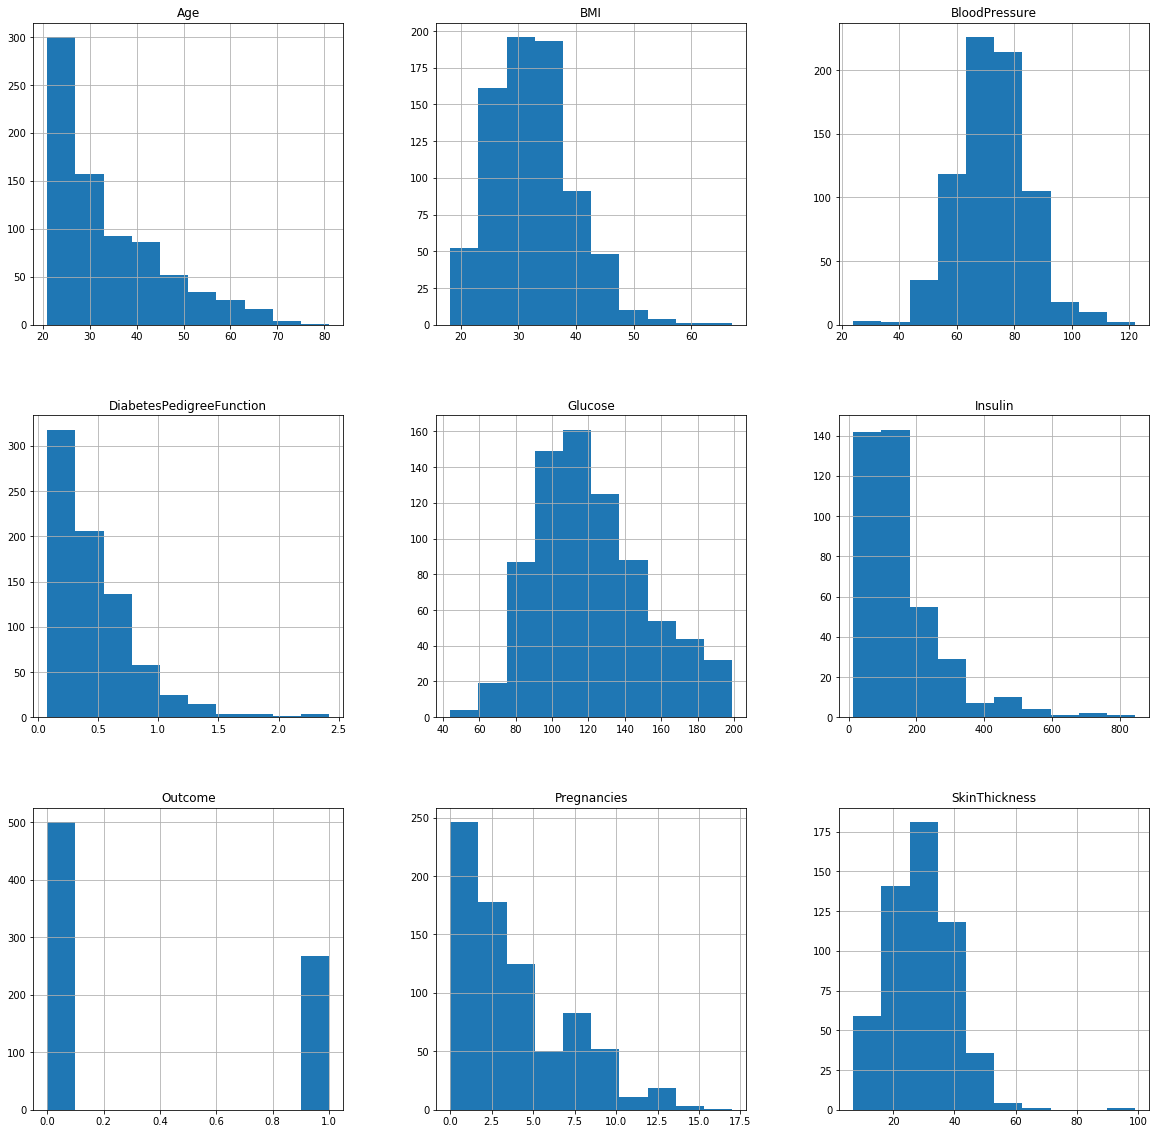

In [10]:
data_cpy.hist(figsize=(20,20));

In [11]:
data_cpy['Glucose'].fillna(data_cpy['Glucose'].mean(), inplace = True)
data_cpy['BloodPressure'].fillna(data_cpy['BloodPressure'].mean(), inplace = True)
data_cpy['SkinThickness'].fillna(data_cpy['SkinThickness'].median(), inplace = True)
data_cpy['Insulin'].fillna(data_cpy['Insulin'].median(), inplace = True)
data_cpy['BMI'].fillna(data_cpy['BMI'].median(), inplace = True)

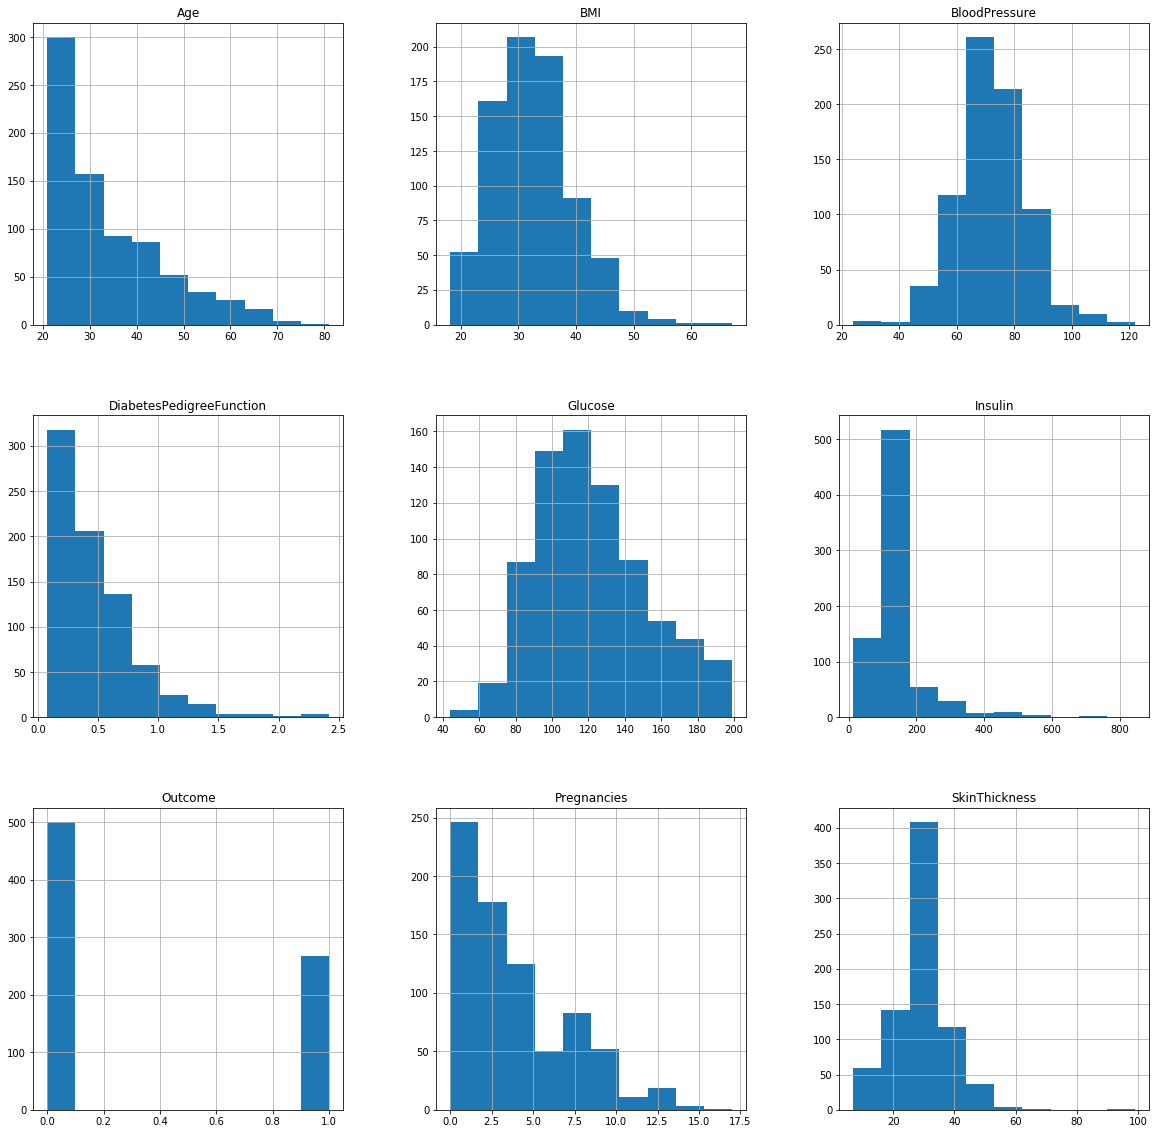

In [12]:
data_cpy.hist(figsize=(20,20));

In [13]:
import seaborn as sns
sns.set()

In [14]:
data_cpy.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

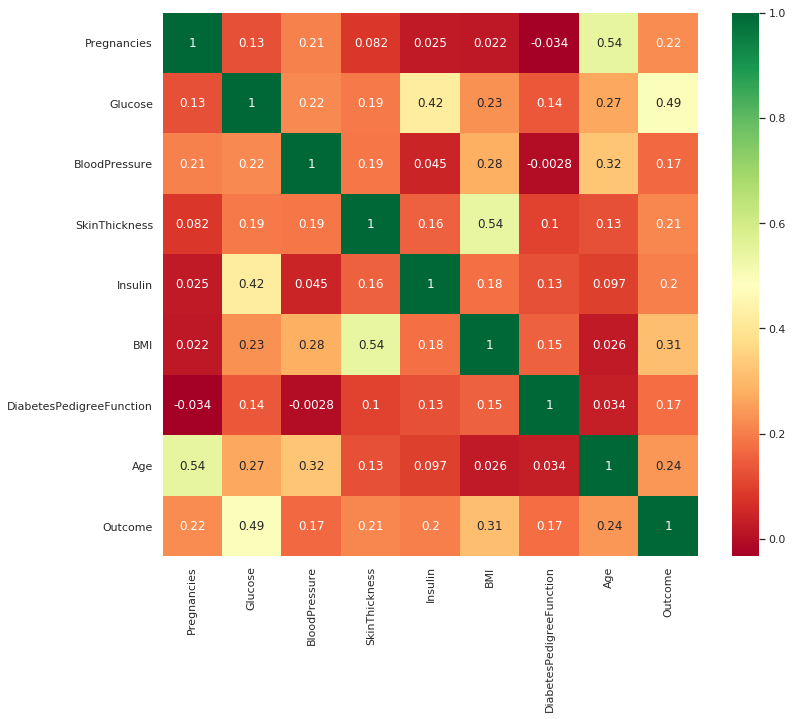

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data_cpy.corr(), annot=True,cmap ='RdYlGn');

In [16]:
data_cpy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
s = StandardScaler()
x = pd.DataFrame(s.fit_transform(data_cpy.drop(['Outcome'],axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
y = data_cpy.Outcome

In [20]:
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 42, stratify=y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
test_score = []
train_score = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [24]:
train_score

[1.0,
 0.8489583333333334,
 0.8559027777777778,
 0.8350694444444444,
 0.8333333333333334,
 0.8107638888888888,
 0.8177083333333334,
 0.8125,
 0.8125,
 0.8142361111111112,
 0.8142361111111112,
 0.8003472222222222,
 0.8090277777777778,
 0.8090277777777778]

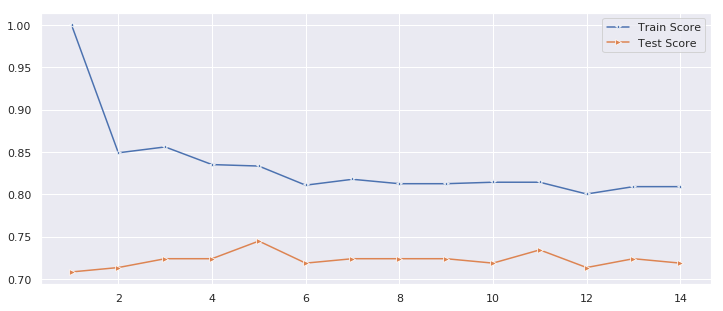

In [25]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15),train_score,marker="*",label="Train Score")
sns.lineplot(range(1,15),test_score,marker=">",label="Test Score");

In [26]:
max(test_score)

0.7447916666666666

In [27]:
knn = KNeighborsClassifier(5)

knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8333333333333334

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


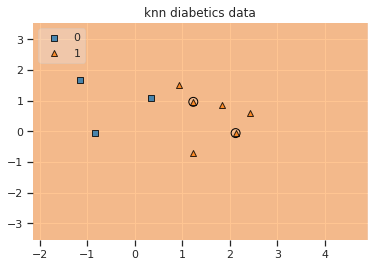

In [28]:
from mlxtend.plotting import plot_decision_regions

width = 2000
value = 2000

plot_decision_regions(x.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=x_test.values)

plt.title('knn diabetics data')
plt.show();

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,105,20,125
1,29,38,67
All,134,58,192


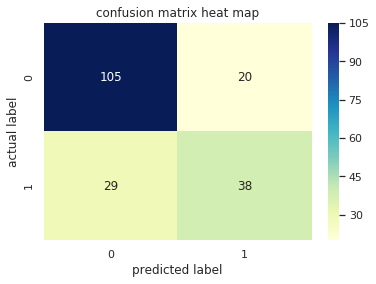

In [30]:
sns.heatmap(pd.DataFrame(cf),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('confusion matrix heat map')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.66      0.57      0.61        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [32]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

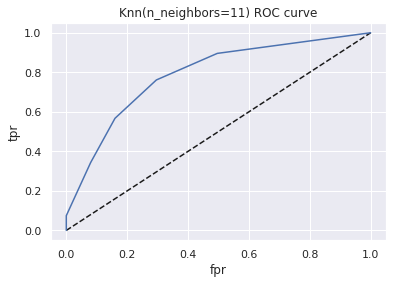

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7868059701492538